# Lab Exercise 02: Exploring Fourier Decomposition and Visible Light

## Objective:
In this lab, you will use Python to explore how light waves can be represented by sine and cosine functions, and how Fourier decomposition can be used to break down complex signals into their component frequencies. You will also adjust the time axis to see how it affects the representation of waves.

**Answer** this notebook by updating the **Answers for Part. x** cell by **double clicking and typing your answers in a cell**. After finishing this notebook, upload in your github repository (**meteo203-2526-lastname/exercises/exercise_02_simulatinglight.ipynb**)

---
## Part 1: Generating a Single Wavelength Light Wave

**Task**: Use the code below to generate and plot a sine wave representing a single light wave.

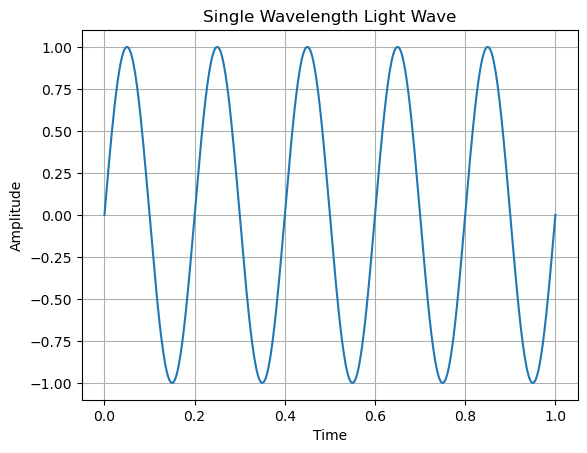

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
A = 1  # Amplitude
f = 5  # Frequency
time_start = 0
time_end = 1
t = np.linspace(time_start, time_end, 500)  # Time array (0 to 2pi)

# Generate the sine wave for a single wavelength
wave = A * np.sin(2 * np.pi * f * t)

# Plot the wave
plt.plot(t, wave)
plt.title("Single Wavelength Light Wave")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


### Questions for Part 1:

1. How many oscillations (peaks) do you see in the plot? What does the frequency ($f=1$) represent?
2. What happens if you increase the frequency to 10? Try changing $f=5$ in the code and re-run the cell.

### Answers for Part 1:

1. If f=5, there are 5 peaks in the graph. It can be imply that the occurence of an event happens 5 times in time T.Frequeny, f, represents a complete cycle of a certain event passing through a fixed points of its crest and trough.
2. If we increased the frequency, f, from 5 to 10, the peaks also increased from 5 to 10. Good to note that the wavelength size is shorter compared to the original plot.

---

## Part 2.: Reducing the Time Axis.
**Task**: Modify the time axis to range from $0$ to $0.5$ and then re-run the code. Keep frequency at $f=5$


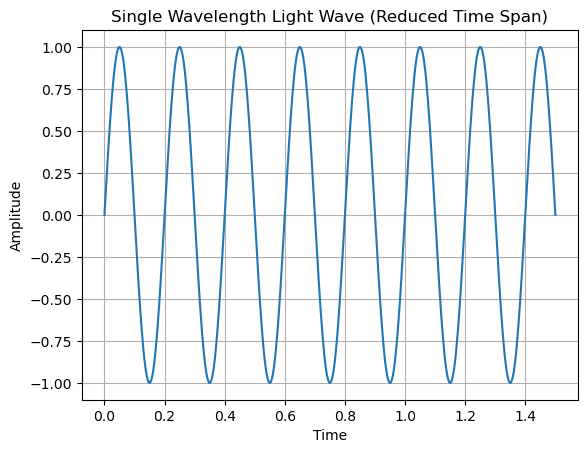

In [7]:
# Adjust the time axis to a shorter range
time_start = 0
time_end = 1.5
t = np.linspace(time_start, time_end, 500)  # Time array (0 to 2pi)

f = 5  # Frequency

# Generate the sine wave for the same frequency
wave = A * np.sin(2 * np.pi * f * t)

# Plot the wave
plt.plot(t, wave)
plt.title("Single Wavelength Light Wave (Reduced Time Span)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


### Questions for Part 2:
1. How many peaks do you see now compared to the original time range?
2. What is the effect of reducing the time axis on the appearance of the wave? Try playing with the $time\_end$ variable (either increasing or decreasing). You can also copy the code and create new blocks if it helps.

### Answers for Part 2:

Edit and enter your answer here
1. Upon changing the time axis from 1.0 to 0.5, the number of peaks had been reduced to only 3, compared to 5 peaks on the original configuration.
2. Changing the time_end or range of time of the cofiguration also changes the number of peaks of the program. If we increase (decrease) the time range (meaning the difference of time_start and time_end), the number of peaks also increases (decreases).

---
## Part 3: Combining Multiple Waves (Simulating White Light)

Now, let's combine multiple sine waves (representing different wavelengths of light) to simulate white light.

**Task**: Run the following code to generate the combined wave.

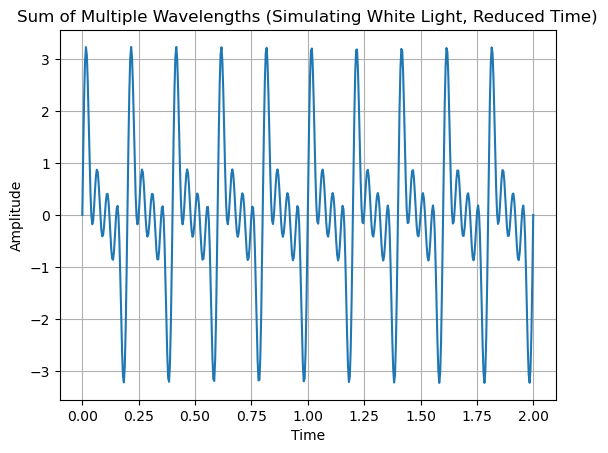

In [29]:
# Define multiple frequencies
freqs = [5, 10, 15, 20] # Arbitrary frequencies representing different colors

time_start = 0
time_end = 2.0
t = np.linspace(time_start, time_end, 500)  # Time array (0 to 2pi)

# Generate the sum of waves
combined_wave = np.zeros_like(t)
for f in freqs:
    combined_wave += A * np.sin(2 * np.pi * f * t)

# Plot the combined wave
plt.plot(t, combined_wave)
plt.title("Sum of Multiple Wavelengths (Simulating White Light, Reduced Time)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


### Questions for Part 3:

1. What happens when you combine multiple sine waves of different frequencies?
2. Does the combined wave still look like a sine wave? Why or why not?

### Answers for Part 3:
1. Combining multiple sine waves of different frequencies, adds up the figure and shows different crests and troughs. Good to note that a certain number of frequencies, corresponds with the same number or crest and trough.
2. Yes, combining sine wave and the result of combined wave still looks like a sine wave, because the periodicity is still present and observed. The cycle of occurence of its peaks and deeps are still present.

---
## Part 4: Fourier Analysis of the Combined Wave

Now we will perform a Fourier transform to decompose the combined wave into its frequency components.

**Task**: Run the Fourier transform code and observe the output.

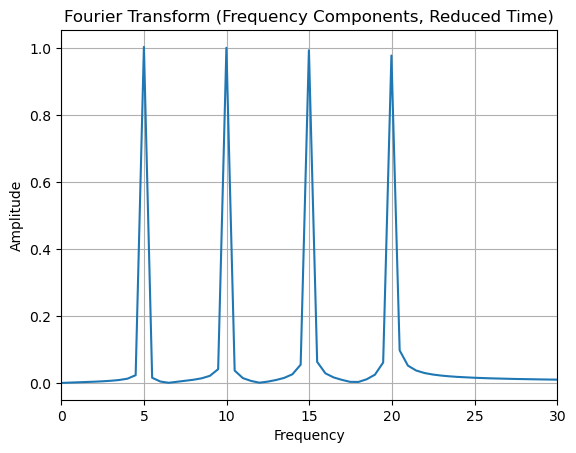

In [31]:
from scipy.fft import fft, fftfreq

# Perform Fourier Transform
N = len(t)
T = t[1] - t[0]  # Sampling interval
yf = fft(combined_wave)
xf = fftfreq(N, T)[:N//2]

# Plot the Fourier Transform (showing the frequency components)
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.title("Fourier Transform (Frequency Components, Reduced Time)")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim([0, 30])
plt.show()

### Questions for Part 4:

1. Look at the Fourier transform plot. What do the peaks in the plot represent?
2. How do the peaks relate to the frequencies of the individual sine waves you combined in the previous section?
3. Why is Fourier analysis useful for breaking down complex signals like white light or other waveforms into their individual frequency components?

### Answers for Part 4:
1. The peaks in the plot represent the frequencies given in the previous scirpt. The f's entered in the previous script were 5, 10, 15 and 20. The same location in the x-axis (frequency) where the peaks are located.
2. The peaks location in the Fourier Transform (FT) plot were the frequencies entered for the sine waves in the previous script.
3. FT analysis is important in determining signals specially in recurring signals. FT aides in determining factors that contributes to the fluctuation based on the signal (peak) of FT Plots.

---
## Part 5: Exploring the Nyquist Frequency

The **Nyquist frequency** is the highest frequency that can be accurately captured with a given sampling rate. According to the **Nyquist theorem**, the sampling rate must be **at least twice the highest frequency present** in the signal to avoid **aliasing** (when high-frequency signals appear as lower frequencies due to under-sampling).

**Task**: Let's experiment with changing the number of samples and observe how it affects the ability to capture the wave frequencies.

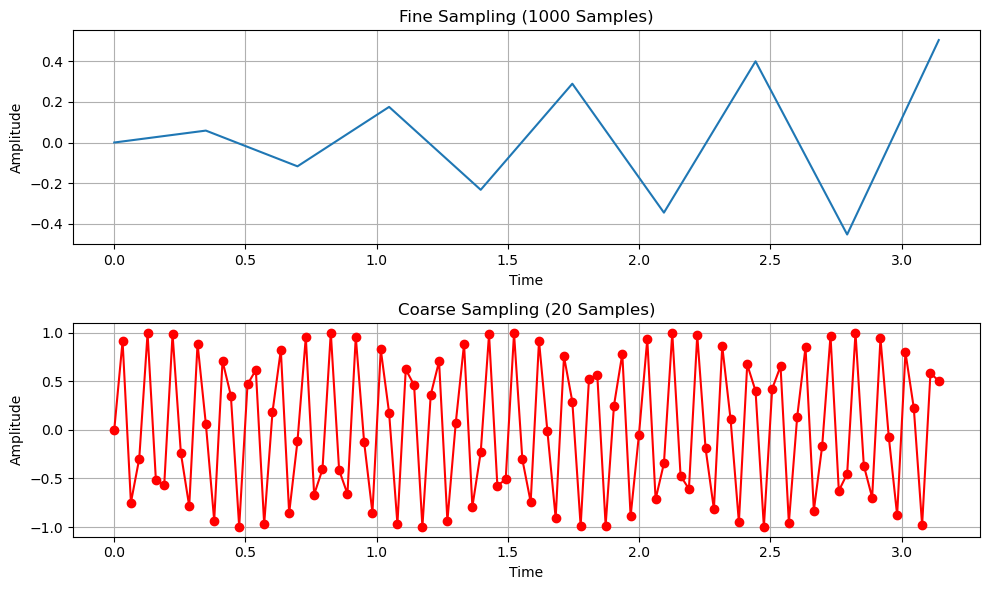

In [44]:
# Adjust the number of samples (sampling rate)

fine_samples = 10
coarse_samples = 100 

t_fine = np.linspace(0, np.pi, fine_samples)  # High sampling rate 
t_coarse = np.linspace(0, np.pi, coarse_samples)  # Low sampling rate

# Generate the same sine wave for a single frequency (f = 10)
wave_fine = A * np.sin(2 * np.pi * 10 * t_fine)
wave_coarse = A * np.sin(2 * np.pi * 10 * t_coarse)

# Plot the wave with different sampling rates
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t_fine, wave_fine, label="Fine Sampling")
plt.title("Fine Sampling (1000 Samples)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t_coarse, wave_coarse, 'o-', label="Coarse Sampling", color='r')
plt.title("Coarse Sampling (20 Samples)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()


### Questions for Part 5:

1. Compare the plots from the fine sampling and coarse sampling. How does reducing the number of samples affect your ability to resolve the wave?
2. What happens to the shape of the wave when you reduce the number of samples?

### Answers for Part 5:
1. Reducing both samples result to lower ability to determine signals of the wave, consequently, reducing the chance to resolve the wave. Implying that, greater number of samples gives a higher accuracy in determining the signals of the wave.
2. Reducing the number of samples give a lesser peaks, and give a wider/longer wave length.

---
## Part 6: Nyquist Frequency and Aliasing

Let’s investigate Nyquist frequency by setting the sampling rate at the Nyquist limit and below it to see the effects of aliasing. Remember, sampling rate must be **at leasttwice the highest frequency**. For example, if $f=10$, your Nyquist limit is $2*f$ or $20$. 

**Task**: Set up a scenario where the sampling rate is just at, or lower than, the Nyquist limit, and observe the results.

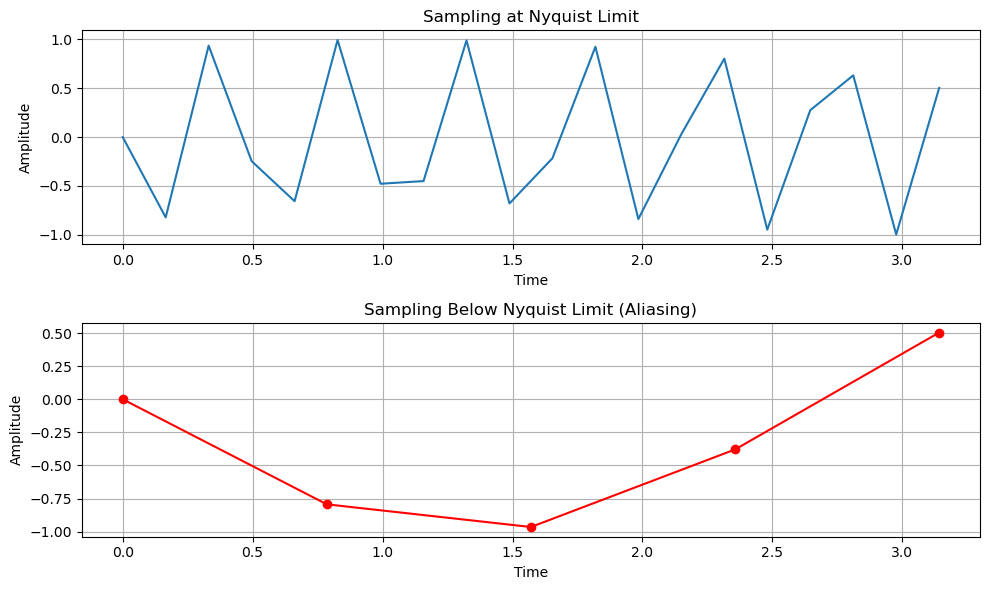

In [47]:
# Nyquist theorem: Sampling rate must be twice the highest frequency (f = 10)

f = 10

# Fine sampling (Nyquist limit)
sampling_rate_fine = 20 # Nyquist limit: twice above the frequency. What should be the value here?
t_fine_nyquist = np.linspace(0, np.pi, int(sampling_rate_fine))

# Coarse sampling (below Nyquist limit)
sampling_rate_coarse = f / 2  # Sampling twice below the Nyquist limit
t_coarse_nyquist = np.linspace(0, np.pi, int(sampling_rate_coarse))

# Generate the wave
wave_fine_nyquist = A * np.sin(2 * np.pi * 10 * t_fine_nyquist)
wave_coarse_nyquist = A * np.sin(2 * np.pi * 10 * t_coarse_nyquist)

# Plot the wave with different sampling rates (Nyquist limit vs below)
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t_fine_nyquist, wave_fine_nyquist, label="At Nyquist Limit")
plt.title("Sampling at Nyquist Limit")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t_coarse_nyquist, wave_coarse_nyquist, 'o-', label="Below Nyquist Limit", color='r')
plt.title("Sampling Below Nyquist Limit (Aliasing)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()


### Questions for Part 6:

1. What do you observe when sampling at the Nyquist limit versus below the Nyquist limit?
2. Describe the effect of aliasing: How does the wave appear when sampled below the Nyquist frequency? Why does it appear distorted?

### Answers for Part 6:
1. Sampling using Nyquist Limit is much better in giving signal compared to sampling below Nyquist Limit. The sampling using Nyquist Limit is giving much more signal based from the number of samples which is 20. On the other hand, the lower panel (sampling below Nyquist Limit) has only 5 samples. Implying that first panel is more accurate over the second panel.
2. Aliasing may result to lost signal and give an inaccuracy for analysis. It appears to have only 2 peaks and distorted because the plot did not capture entire signal of the data provided, limiting its analysis to only few data and consequently may result to limited interpretation or worse wrong interpretation of the signal.

---
## Conclusion

In this lab exercise, you:

- Simulated light waves using sine functions.
- Combined multiple sine waves to represent "white light."
- Performed Fourier analysis to break down complex signals into their frequency components.
- Explored how the Nyquist frequency and sampling rate affect the ability to capture and represent signals accurately, especially in relation to aliasing.

### Final Questions:
1. Why is it important to sample at a rate at least twice the highest frequency present in a signal (as per the Nyquist theorem)?
2. How does aliasing affect real-world measurements in fields like meteorology and oceanography? Give examples (e.g., wind speed or ocean current measurements).

### Answer to Final question:

1. It is important to sample at a rate at least twice the highest frequency in order to capture all signals brought by the wave. The same concept on analysing large data sets. It is better to have a bigger size of sample in order to have a higher accuracy and to capture all necesarry signals specially dealing with variabilities, dispersion and trends. Higher or bigger data sets and rates results to higher accuracy.
2. In the real-world, the concept of aliasing is very important. Specially in managing data sets, in plotting rainfall, if aliasing will be use to analyse trends and variability of rainfall, it might result and give wrong signal, that might later result ti inaccuracy of weather forecasting and climate prediction. This is also proves to be true in determining signals of ENSO, aliasing might give other result and interpretation once used, and may result to inaccuracy of forecastig/predicting ENSO events.